In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
ref = {}
ref[5]  = {'LOWESA': [-116.61270084, -141.5960901, -145.20687214, -145.49946007],
           'MPS': [-146.18016012, -145.77197158, -145.59725518, -145.5371411]}
ref[10] = {'LOWESA': [-86.32582312, -150.75932094, -158.73356676, -159.27003202]}

In [3]:
res = {}
for p in [5, 10]:
    res[p] = {}
    for r in [3, 4]:
        with open(f"./results/{p=}/results_{r=}.csv", 'r') as f:
            rd = csv.DictReader(f, delimiter=';', quotechar="'")
            res[p][r] = list(rd)


In [4]:
def plot_energy(p):
    eng0 = {5: -145.5, 10: -159}
    clrs = {"BP": 'blue', "NN+": 'black', "NN+BP": 'red'}
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)
    for i, r in enumerate([3, 4]):
        for pt in res[p][r]:
            mrk = 'x' if pt["chi"] == '1' else '+'
            clr = clrs[pt["which"]]
            ax[i].scatter([1 / float(pt["D"])], eng0[p] - float(pt["eng"]),
                        marker=mrk, color=clr, s=50)

        ax[i].set_yscale('log')
        ax[i].set_xlabel('1 / D')
        ax[i].set_ylabel(f'{eng0[p]} - eng')
        ax[i].set_ylim(1e-2, 10)
        ax[i].set_xlim(0, 0.26)

        ax[i].grid(which='major')
        ax[i].grid(which='minor')
        ax[i].set_title(f'{p=}, tensor rank {r}')

        ax[i].scatter([1.2], [1e-2], marker='+', color='black', s=50, label='MPS chi=4*D')
        ax[i].scatter([1.2], [1e-2], marker='x', color='black', s=50, label='BP (chi=1)')
        for k, v in clrs.items():
            ax[i].scatter([1.2], [1e-2], marker='o', color=v, s=50, label=k)

        ax[i].legend()
    # plt.legend()
# plt.show()

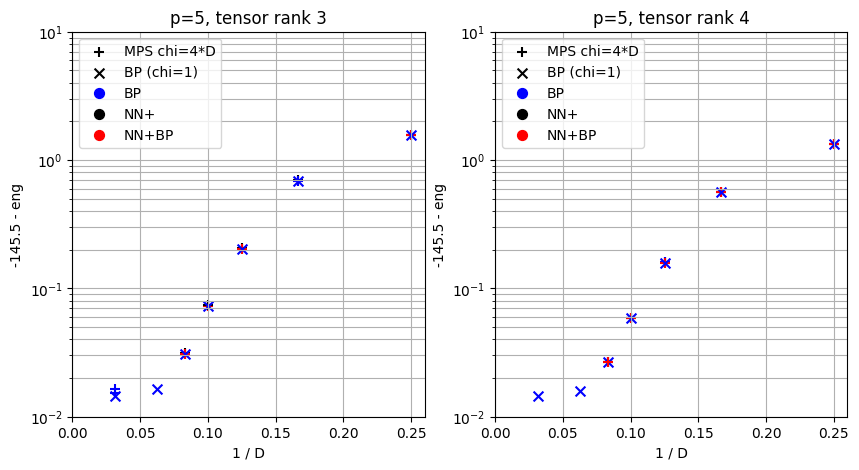

In [5]:
plot_energy(p=5)

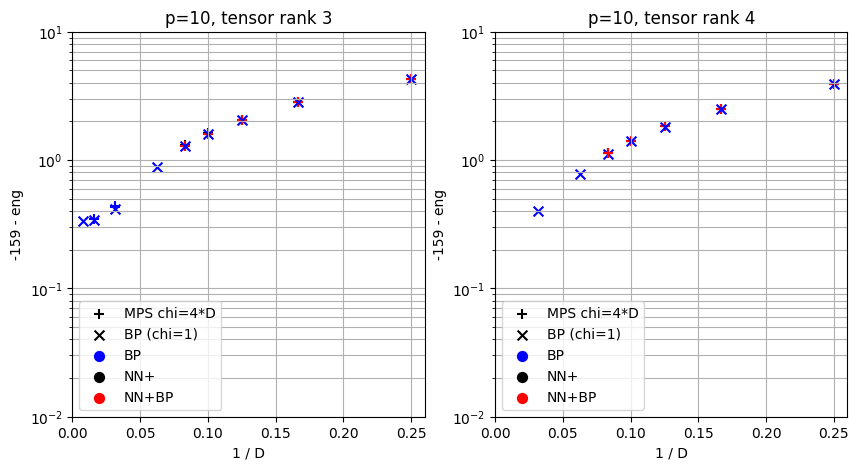

In [6]:
plot_energy(p=10)

In [7]:
def plot_contraction_comparison(p):
    clrs = {"BP": 'blue', "NN+": 'black', "NN+BP": 'red'}
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)

    for i, r in enumerate([3, 4]):
        res_eng = {(pt["which"], pt["D"], pt["chi"]): float(pt["eng"]) for pt in res[p][r]}

        for (which, D, chi), eng in res_eng.items():
            if chi != '1' and (which, D, '1') in res_eng:
                dE = eng - res_eng[(which, D, '1')]
                clr = clrs[which]
                ax[i].scatter([1 / float(D)], abs(dE),
                            marker='+', color=clr, s=100)

        ax[i].set_yscale('log')
        ax[i].set_xlabel('1 / D')
        ax[i].set_ylabel(f'|eng(MPS chi=4D) - eng(BP chi=1)|')
        ax[i].set_ylim(1e-4, 1e-2)
        ax[i].set_xlim(0, 0.26)

        ax[i].grid(which='major')
        ax[i].grid(which='minor')
        ax[i].set_title(f'{p=}, tensor rank {r}')

        # ax[i].scatter([1.2], [1e-2], marker='+', color='black', s=50, label='MPS chi=4*D')
        # ax[i].scatter([1.2], [1e-2], marker='x', color='black', s=50, label='BP (chi=1)')
        for k, v in clrs.items():
            ax[i].scatter([1.2], [1e-2], marker='o', color=v, s=50, label=k)

        ax[i].legend()
        # plt.legend()
    # plt.show()

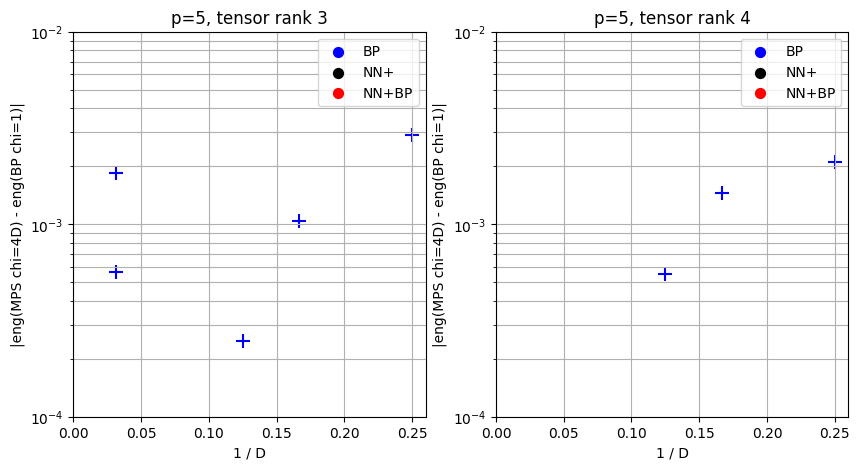

In [8]:
plot_contraction_comparison(p=5)

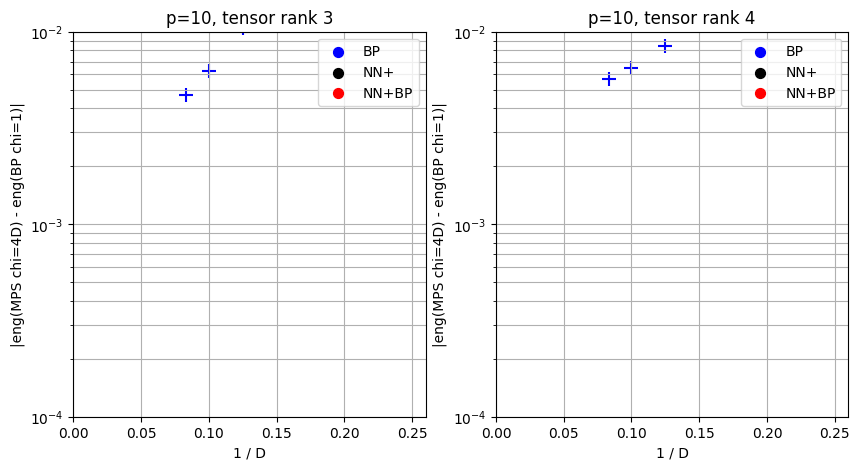

In [9]:
plot_contraction_comparison(p=10)